In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as func
from pyspark.sql.functions import col, lit, concat, array, coalesce

from pyspark.ml.linalg import Vectors
from pandas import Series,DataFrame
import pandas as pd
import numpy as np

import ast
import time

## Clean/Prepare Data

In [6]:
lines = sc.textFile("/Users/xuelang/Desktop/BU/cs777/Module3/taxi-data-sorted-small.csv")

In [7]:
taxilines = lines.map(lambda x: x.split(','))

# Exception Handling and removing wrong data lines
def isfloat(value): 
    try :
        float(value)
        return True
    except :
        return False

# Remove lines if they don’t have 16 values and 
# with total amount of larger than 600 USD and less than 1 USD
def correctRows (p) : 
    if(len(p) == 17):
        if(isfloat(p[5]) and isfloat(p[11])): 
            if(float(p[5])!=0 and float(p[11])!=0):
                if(float(p[11])>=1 and float(p[11])<=600):
                    return p

# cleaning up data
texilinesCorrected = taxilines.filter(correctRows)

## Task 1

In [8]:
start = time.time()

In [9]:
xy = texilinesCorrected.map(lambda x: float(x[5])*float(x[11])).sum()
x = texilinesCorrected.map(lambda x: float(x[5])).sum()
x2 = texilinesCorrected.map(lambda x: float(x[5])**2).sum()
y = texilinesCorrected.map(lambda x: float(x[11])).sum()
n = texilinesCorrected.count()
m = (n*xy-x*y)/(n*x2-(x**2))
b = (x2*y-x*xy)/(n*x2-(x**2))

In [10]:
print("The slope is %.4lf." % m)
print("The intercept is %.4lf." % b)

The slope is 2.6986.
The intercept is 3.9702.


In [11]:
end = time.time()
print("Time it took is %.4lf" % (end-start))

Time it took is 47.1611


## Task 2

In [12]:
b_current = 0.1 
m_current = 0.1

learningRate = 0.01
maxIteration = 400
num_iteration = 100

precision = 0.01

previous_step_size = 1 

oldCost=0

In [14]:
n = texilinesCorrected.count()
initCost = texilinesCorrected.map(lambda x: (float(x[11])-(m_current*float(x[5])+b_current))**2).sum()

Iteration No.= 0  m =  1.3783430859138257  b= 0.3283392434996259  Cost= 436320487.1504411
Iteration No.= 1  m =  2.125151327080011  b= 0.47786253951552726  Cost= 170110028.2328706
Iteration No.= 2  m =  2.5605001030747423  b= 0.5810189965930902  Cost= 78495301.60778184
Iteration No.= 3  m =  2.813355991652339  b= 0.656826247247734  Cost= 46843010.77959038
Iteration No.= 4  m =  2.9592946949343806  b= 0.7164308902364099  Cost= 35786785.84963435
Iteration No.= 5  m =  3.0426042082929996  b= 0.7663669784271789  Cost= 31807706.345493816
Iteration No.= 6  m =  3.0892375492899706  b= 0.8104655330572103  Cost= 30263137.590638958
Iteration No.= 7  m =  3.1144032161990736  b= 0.850973542850196  Cost= 29558656.165889848
Iteration No.= 8  m =  3.1270132900739487  b= 0.8892097115298813  Cost= 29146628.31477824
Iteration No.= 9  m =  3.1322900772625553  b= 0.9259487341897952  Cost= 28838900.85759987
Iteration No.= 10  m =  3.1332936339619017  b= 0.9616464882288496  Cost= 28570772.039586354
Iteratio

Iteration No.= 91  m =  2.873246636531616  b= 2.7857804598333415  Cost= 19468996.267998543
Iteration No.= 92  m =  2.8712495189434257  b= 2.799327429543868  Cost= 19431026.781239275
Iteration No.= 93  m =  2.869275243189779  b= 2.812719457130555  Cost= 19393920.87202164
Iteration No.= 94  m =  2.8673235480194554  b= 2.825958314728593  Cost= 19357658.899145916
Iteration No.= 95  m =  2.8653941751692678  b= 2.839045754204551  Cost= 19322221.668138176
Iteration No.= 96  m =  2.863486869329894  b= 2.8519835073881956  Cost= 19287590.42107225
Iteration No.= 97  m =  2.8616013781120837  b= 2.864773286301669  Cost= 19253746.826666377
Iteration No.= 98  m =  2.859737452013265  b= 2.877416783386022  Cost= 19220672.970554218
Iteration No.= 99  m =  2.857894844384523  b= 2.8899156717251824  Cost= 19188351.345819782
The number of iterations run in total is 99
m =  2.857894844384523  b= 2.8899156717251824


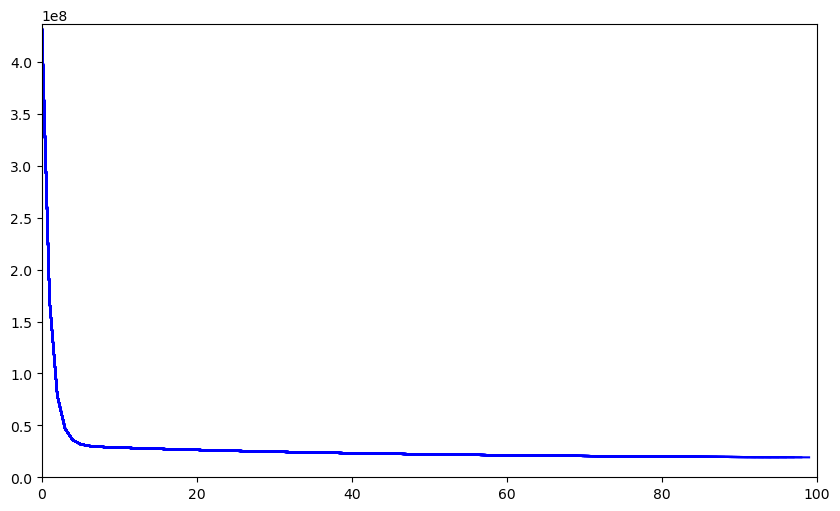

In [15]:
# two variables for visualizing the cost
xx, costHist = [], [] 

fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
ax1 = plt.subplot(1, 1, 1)
ax1.set_xlim(left = 0, right=num_iteration)
ax1.set_ylim(bottom = 0, top=initCost)

# Let's start with main iterative part of gradient descent algorithm 

# Start of iterations
for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    #y_prediction = m_current * x + b_current
    
    # We compute costs just for monitoring 
    cost = texilinesCorrected.map(lambda x: (float(x[11])-(m_current*float(x[5])+b_current))**2).sum()
    #cost= (1/n) * sum (( y_prediction - y)**2)

    # calculate gradients. 
    m_gradient = (-2.0/n) * texilinesCorrected.map(lambda x: float(x[5])*(float(x[11])-(m_current*float(x[5])+b_current))).sum()
    b_gradient = (-2.0/n) * texilinesCorrected.map(lambda x: float(x[11])-(m_current*float(x[5])+b_current)).sum()
    
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    
    # Stop if the cost is not descreasing 
    if(abs(cost - oldCost) <= precision):
        print("Stopped at iteration", i)
        break
        
    if(i >= maxIteration):
        print("Reach maximum iteration allowed, stopped at iteration", maxIteration)
        break
    
    oldCost = cost
    
    # Visualization     
    # Update the Cost Diagram. 
    xx.append(i)
    costHist.append(cost)    
    ax1.plot(xx, costHist, color='blue')

    fig.canvas.draw()
    
    print("Iteration No.=", i ," m = ", m_current, " b=", b_current, " Cost=", cost) 

print("The number of iterations run in total is %d" % i)    
print("m = ", m_current, " b=", b_current)

## Task 3

Using example from https://github.com/kiat/BigDataAnalytics/blob/master/Notebooks/Spark-Example-18-Linear-Regression-with-Vectorized-GD-2d.ipynb

In [ ]:
texilinesCorrected = sc.textFile("/Users/pudding/Downloads/taxi_clean_data")
texilinesCorrected = texilinesCorrected.map(lambda x: ast.literal_eval(x))

In [46]:
column_names = ['medallion', 'hack_license', 'pickup_datetime', 'dropoff_datetime', 
               'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 
               'pickup_latitude', 'dropoff_logitude', 'dropoff_latitude', 
               'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 
               'tip_amount', 'tolls_amount', 'total_amount']

In [48]:
# create the dataframe from RDD
taxiDF = sqlContext.createDataFrame(texilinesCorrected, column_names)

In [49]:
# create a column by adding the fare amount and tips
taxiDF = taxiDF.withColumn('amount_with_tip', func.expr("fare_amount+tip_amount"))

In [50]:
# using regular expression, extract the pickup hour
taxiDF = taxiDF.withColumn('pickup_hour', func.regexp_extract(col('pickup_datetime'), '(.)([0-9]{2}):(.)', 2))

In [51]:
# check whether the pickup hour is between 1am and 6am, count as a night ride
taxiDF = taxiDF.withColumn("isNightRides", (col('pickup_hour') >= 1) & (col('pickup_hour') <= 6))

In [52]:
# calculate all the variables by Driver ID
taxi_reg_data = taxiDF.groupBy('hack_license').agg(func.sum('trip_time_in_secs').alias('total_working_time'),\
                                  func.sum('trip_distance').alias('total_travel_distance'),\
                                  func.sum('tolls_amount').alias('total_amount_of_toll'),\
                                  func.count(lit(1)).alias('total_number_of_rides'),\
                                  func.sum(col('isNightRides').cast('long')).alias('total_night_rides'),\
                                  func.sum('amount_with_tip').alias('total_earning'))

In [53]:
taxi_reg_data.show()

+--------------------+------------------+---------------------+--------------------+---------------------+-----------------+------------------+
|        hack_license|total_working_time|total_travel_distance|total_amount_of_toll|total_number_of_rides|total_night_rides|     total_earning|
+--------------------+------------------+---------------------+--------------------+---------------------+-----------------+------------------+
|3183016714F5E253E...|           79020.0|               386.93|   71.99999999999999|                   94|                0|           1555.14|
|31195E1D3AA1EC26D...|          102840.0|               396.31|   38.39999999999999|                  142|                0|1902.1700000000003|
|69996930170E51265...|          147900.0|    583.5900000000001|                 9.6|                  269|               43|2796.0099999999998|
|FDEA95843CF14F503...|          154800.0|               603.56|  63.050000000000004|                  223|                1|2831.5999999

In [57]:
taxi_reg_data.columns

['hack_license',
 'total_working_time',
 'total_travel_distance',
 'total_amount_of_toll',
 'total_number_of_rides',
 'total_night_rides',
 'total_earning']

In [125]:
df = taxi_reg_data.withColumn('x', array(lit(1), 'total_working_time', 'total_travel_distance', 'total_amount_of_toll', 'total_number_of_rides', 'total_night_rides'))

In [126]:
df = df.withColumn('y', col('total_earning'))

In [127]:
df.columns

['hack_license',
 'total_working_time',
 'total_travel_distance',
 'total_amount_of_toll',
 'total_number_of_rides',
 'total_night_rides',
 'total_earning',
 'x',
 'y']

In [128]:
df_reg = df.select(col('y'), col('x'))

In [129]:
df_reg.columns

['y', 'x']

In [130]:
df_reg.show()

+------------------+--------------------+
|                 y|                   x|
+------------------+--------------------+
|           1555.14|[1.0, 79020.0, 38...|
|1902.1700000000003|[1.0, 102840.0, 3...|
|2796.0099999999998|[1.0, 147900.0, 5...|
|2831.5999999999995|[1.0, 154800.0, 6...|
|1784.1500000000003|[1.0, 107160.0, 3...|
|           1724.29|[1.0, 97980.0, 32...|
|1857.8099999999997|[1.0, 111000.0, 3...|
|2635.1099999999997|[1.0, 149280.0, 5...|
|           2433.74|[1.0, 116640.0, 5...|
|           1709.76|[1.0, 98640.0, 34...|
|           1965.85|[1.0, 114000.0, 3...|
|           2176.21|[1.0, 115980.0, 4...|
|           2063.62|[1.0, 117180.0, 4...|
|2200.6600000000003|[1.0, 119580.0, 4...|
|            2378.5|[1.0, 128520.0, 4...|
|2494.8499999999995|[1.0, 134700.0, 5...|
|           1804.26|[1.0, 98640.0, 35...|
|           1521.01|[1.0, 88920.0, 28...|
|2096.4500000000003|[1.0, 110040.0, 4...|
|           1997.03|[1.0, 103980.0, 4...|
+------------------+--------------

In [142]:
# Now we do gradient Decent on our RDD data set. 

learningRate = 0.00000000001
num_iteration = 100
maxIteration = 400

precision = 0.01

previous_step_size = 1 

beta = np.zeros(6)
oldCost = 0

In [143]:
# # Now, we create an RDD from this data. 
# # X is a numpy array 
# # y is a simple value lable
myRDD = df_reg.rdd.map(lambda x: (float(x[0]), np.array(x[1])))

In [144]:
myRDD.take(5)

[(1555.14,
  array([1.0000e+00, 7.9020e+04, 3.8693e+02, 7.2000e+01, 9.4000e+01,
         0.0000e+00])),
 (1902.1700000000003,
  array([1.0000e+00, 1.0284e+05, 3.9631e+02, 3.8400e+01, 1.4200e+02,
         0.0000e+00])),
 (2796.0099999999998,
  array([1.0000e+00, 1.4790e+05, 5.8359e+02, 9.6000e+00, 2.6900e+02,
         4.3000e+01])),
 (2831.5999999999995,
  array([1.0000e+00, 1.5480e+05, 6.0356e+02, 6.3050e+01, 2.2300e+02,
         1.0000e+00])),
 (1784.1500000000003,
  array([1.0000e+00, 1.0716e+05, 3.7148e+02, 2.4000e+01, 1.5000e+02,
         1.6000e+01]))]

In [145]:
size = myRDD.count()

0 Beta [0. 0. 0. 0. 0. 0.]  Cost 52748652071.77891
1 Beta [1.27602548e-08 1.35145306e-03 5.80307940e-06 4.51125332e-07
 2.00041903e-06 2.04503292e-07]  Cost 45595071076.84623
2 Beta [2.46223244e-08 2.60720205e-03 1.12004301e-05 8.71518411e-07
 3.85882191e-06 3.94878469e-07]  Cost 39418786952.08431
3 Beta [3.56498143e-08 3.77402434e-03 1.62207840e-05 1.26335556e-06
 5.58526560e-06 5.72126024e-07]  Cost 34086284863.97765
4 Beta [4.59018259e-08 4.85821732e-03 2.08908384e-05 1.62865899e-06
 7.18909487e-06 7.37175596e-07]  Cost 29482290302.205032
5 Beta [5.54332752e-08 5.86563244e-03 2.52354000e-05 1.96930770e-06
 8.67899275e-06 8.90890996e-07]  Cost 25507277151.353546
6 Beta [6.42951893e-08 6.80170678e-03 2.92775187e-05 2.28704763e-06
 1.00630274e-05 1.03407486e-06]  Cost 22075316201.040295
7 Beta [7.25349816e-08 7.67149238e-03 3.30386124e-05 2.58350108e-06
 1.13486955e-05 1.16747298e-06]  Cost 19112217584.953274
8 Beta [8.01967083e-08 8.47968351e-03 3.65385818e-05 2.86017546e-06
 1.254296

67 Beta [1.82946320e-07 1.89449288e-02 8.52542837e-05 7.23259963e-06
 2.77765566e-05 3.13155954e-06]  Cost 388920862.1860512
68 Beta [1.83115631e-07 1.89547828e-02 8.53697748e-05 7.25291391e-06
 2.77861641e-05 3.13801202e-06]  Cost 388540495.2942606
69 Beta [1.83278392e-07 1.89639390e-02 8.54823074e-05 7.27300411e-06
 2.77947361e-05 3.14436149e-06]  Cost 388212089.5734286
70 Beta [1.83435068e-07 1.89724467e-02 8.55920910e-05 7.29288608e-06
 2.78023459e-05 3.15061524e-06]  Cost 387928546.2726012
71 Beta [1.83586089e-07 1.89803520e-02 8.56993204e-05 7.31257457e-06
 2.78090616e-05 3.15678005e-06]  Cost 387683736.44701207
72 Beta [1.83731857e-07 1.89876974e-02 8.58041764e-05 7.33208330e-06
 2.78149466e-05 3.16286221e-06]  Cost 387472368.46659905
73 Beta [1.83872742e-07 1.89945226e-02 8.59068271e-05 7.35142497e-06
 2.78200596e-05 3.16886757e-06]  Cost 387289873.62503827
74 Beta [1.84009091e-07 1.90008645e-02 8.60074287e-05 7.37061144e-06
 2.78244554e-05 3.17480158e-06]  Cost 387132307.37646

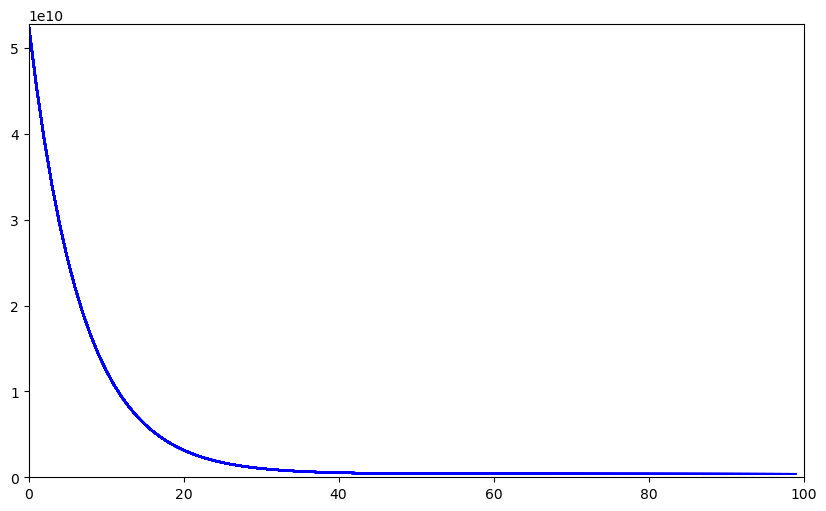

In [146]:
initCost = myRDD.map(lambda x: (x[1], (x[0] - np.dot(x[1] , beta) )))\
                           .map(lambda x: (x[0]*x[1], x[1]**2 )).reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))

# two variables for visualizing the cost
xx, costHist = [], [] 

fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
ax2 = plt.subplot(1, 1, 1)
ax2.set_xlim(left = 0, right=num_iteration)
ax2.set_ylim(bottom = 0, top=initCost[1])

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):

    gradientCost = myRDD.map(lambda x: (x[1], (x[0] - np.dot(x[1] , beta) )))\
                           .map(lambda x: (x[0]*x[1], x[1]**2 )).reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))
    
    cost = gradientCost[1]
    
    gradient = (-1/float(size)) * gradientCost[0]
    
    # Stop if the cost is not descreasing 
    if(abs(cost - oldCost) <= precision):
        print("Stopped at iteration", i)
        break
        
    if(i >= maxIteration):
        print("Reach maximum iteration allowed, stopped at iteration", maxIteration)
        break

    oldCost = cost
    
    # Visualization     
    # Update the Cost Diagram. 
    xx.append(i)
    costHist.append(cost)    
    ax2.plot(xx, costHist, color='blue')

    fig.canvas.draw()
    
    print(i, "Beta", beta, " Cost", cost)
    beta = beta - learningRate * gradient

In [147]:
costHist

[52748652071.77891,
 45595071076.84623,
 39418786952.08431,
 34086284863.97765,
 29482290302.205032,
 25507277151.353546,
 22075316201.040295,
 19112217584.953274,
 16553926993.284914,
 14345140988.936771,
 12438111494.315163,
 10791613604.90227,
 9370054416.477623,
 8142703601.205014,
 7083029099.68658,
 6168123568.413212,
 5378209183.930822,
 4696210098.905739,
 4107383307.7266736,
 3598999941.939424,
 3160070105.9693513,
 2781105304.81187,
 2453913328.009627,
 2171421155.853467,
 1927522059.510365,
 1716943589.7897954,
 1535133600.8168244,
 1378161844.7468603,
 1242635010.2616336,
 1125623368.2045984,
 1024597438.629579,
 937373310.1726834,
 862065429.6977614,
 797045841.6531253,
 740908996.0028366,
 692441363.9736676,
 650595204.7909625,
 614465916.3100653,
 583272479.9241655,
 556340577.0195085,
 533088012.0006357,
 513012126.7702371,
 495678934.5981439,
 480713738.4826144,
 467793031.19784486,
 456637501.9282623,
 447005998.3116571,
 438690313.36656666,
 431510684.61116475,
 4253